# LSTM

Reference : https://medium.com/@techwithjulles/recurrent-neural-networks-rnns-and-long-short-term-memory-lstm-creating-an-lstm-model-in-13c88b7736e2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


Epoch 1/50


d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016 - val_loss: 1.2518e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0166e-04 - val_loss: 9.6208e-05
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9898e-05 - val_loss: 8.3797e-05
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6365e-05 - val_loss: 9.5659e-05
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9265e-05 - val_loss: 7.5030e-05
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0848e-05 - val_loss: 7.6648e-05
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0278e-05 - val_loss: 7.7550e-05
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2126e-05 - val_loss: 6.6621e-05
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8266e-05 - val_loss: 6.2593e-05
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1379e-05 - val_loss: 6.5979e-05
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5722e-05 - val_loss: 9.0798e-05
E

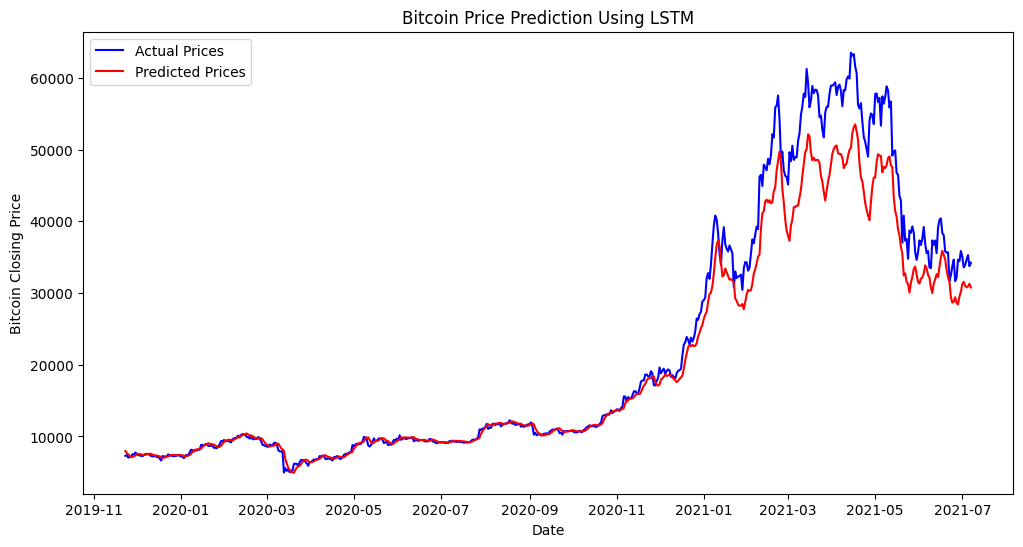

In [2]:

# Load dataset
df = pd.read_csv("coin_Bitcoin.csv")  # Replace with your actual file name

# Convert Date column to datetime and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Filter data for Bitcoin (BTC)
df = df[df['Symbol'] == 'BTC']

# Select 'Close' price for prediction
data = df[['Close']].dropna()

# Scale data using MinMaxScaler (0 to 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences of past prices for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length (past 30 days of data)
seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

# Split into training and test sets (80-20 split)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to LSTM format (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu',  input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test_inv, label="Actual Prices", color='blue')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred_inv, label="Predicted Prices", color='red')
plt.xlabel("Date")
plt.ylabel("Bitcoin Closing Price")
plt.title("Bitcoin Price Prediction Using LSTM")
plt.legend()
plt.show()
